In [108]:
#Question 1
import torch
import numpy as np
import torch.utils.data
import torch.nn.functional as F
from torch.autograd import Variable
import timeit


class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 6, kernel_size=5, padding=2),
            torch.nn.BatchNorm2d(6),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2))
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(6, 12, kernel_size=5, padding=2),
            torch.nn.BatchNorm2d(12),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2))
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(12, 24, kernel_size=5, padding=2),
            torch.nn.BatchNorm2d(24),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2))
        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(4 * 4 * 24, 120),
            torch.nn.Tanh())
        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(120, 84),
            torch.nn.Tanh())
        self.fc3 = torch.nn.Sequential(
            torch.nn.Linear(84, 10))

    def forward_pass(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out


class ConvNet:
    # Initialize the class
    def __init__(self, X, Y):  
        
        # Check if there is a GPU available
        if torch.cuda.is_available() == True:
            self.dtype_double = torch.cuda.FloatTensor
            self.dtype_int = torch.cuda.LongTensor
        else:
            self.dtype_double = torch.FloatTensor
            self.dtype_int = torch.LongTensor
        
        # Define PyTorch dataset
        X = torch.from_numpy(X).type(self.dtype_double) # num_images x num_pixels_x x num_pixels_y
        Y = torch.from_numpy(Y).type(self.dtype_int) # num_images x 1
        self.train_data = torch.utils.data.TensorDataset(X, Y)
        
        # Define architecture and initialize
        self.net = CNN()
        
        # Define the loss function
        self.loss_fn = torch.nn.CrossEntropyLoss()
        
        # Define the optimizer
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=1e-3)
        
           
    # Trains the model by minimizing the Cross Entropy loss
    def train(self, num_epochs = 10, batch_size = 128):
        
        # Create a PyTorch data loader object
        self.trainloader = torch.utils.data.DataLoader(self.train_data, 
                                                  batch_size=batch_size, 
                                                  shuffle=True)
       
        start_time = timeit.default_timer()
        for epoch in range(num_epochs):
            for it, (images, labels) in enumerate(self.trainloader):
                images = Variable(images)
                labels = Variable(labels)
        
                # Reset gradients
                self.optimizer.zero_grad()
                
                # Forward pass
                outputs = self.net.forward_pass(images)
                
                # Compute loss
                loss = self.loss_fn(outputs, labels)
                
                # Backward pass
                loss.backward()
                
                # Update parameters
                self.optimizer.step()
        
                if (it+1) % 100 == 0:
                    elapsed = timeit.default_timer() - start_time
                    print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, Time: %2fs' 
                           %(epoch+1, num_epochs, it+1, len(self.train_data)//batch_size, loss.cpu().data, elapsed))
                    start_time = timeit.default_timer()
                   
                    
    def test(self, X, Y):
        # Define PyTorch dataset
        X = torch.from_numpy(X).type(self.dtype_double) # num_images x num_pixels_x x num_pixels_y
        Y = torch.from_numpy(Y).type(self.dtype_int) # num_images x 1
        test_data = torch.utils.data.TensorDataset(X, Y)
       
        # Create a PyTorch data loader object
        test_loader = torch.utils.data.DataLoader(test_data, 
                                                  batch_size=128, 
                                                  shuffle=True)
        
        # Test prediction accuracy
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = Variable(images)
            outputs = self.net.forward_pass(images)
            _, predicted = torch.max(outputs.cpu().data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()

        print('Test Accuracy of the model on the %d test images: %.5f %%' % (len(test_data), 100.0 * correct / total))
        
    
    # Evaluates predictions at test points    
    def predict(self, X_star):
        X_star = torch.from_numpy(X_star).type(self.dtype_double) 
        X_star = Variable(X_star, requires_grad=False)
        y_star = self.net.forward_pass(X_star)
        y_star = y_star.cpu().data.numpy()
        return y_star

In [109]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pickle


f1 = open('./cifar10batchespy/data_batch_1','rb')
dic1 = pickle.load(f1,encoding='bytes')    
f2 = open('./cifar10batchespy/data_batch_2','rb')
dic2 = pickle.load(f2,encoding='bytes') 
f3 = open('./cifar10batchespy/data_batch_3','rb')
dic3 = pickle.load(f3,encoding='bytes')  
f4 = open('./cifar10batchespy/data_batch_4','rb')
dic4 = pickle.load(f4,encoding='bytes')  
f5 = open('./cifar10batchespy/data_batch_5','rb')
dic5 = pickle.load(f5,encoding='bytes')

f6 = open('./cifar10batchespy/test_batch','rb')
dic6 = pickle.load(f6,encoding='bytes')

data_train = np.vstack((dic1[b'data'],dic2[b'data'],dic3[b'data'],dic4[b'data'],dic5[b'data']))
labels_train = np.concatenate((dic1[b'labels'],dic2[b'labels'],dic3[b'labels'],dic4[b'labels'],dic5[b'labels']))
data_test = dic6[b'data']
labels_test = dic6[b'labels']
print(np.shape(data_train))
print(np.shape(labels_train))
print(np.shape(data_test))
print(np.shape(labels_test))

    
mean = np.mean(data_train, axis = 0)
std = np.std(data_train, axis = 0)

data_train = (data_train - mean)/std
data_test = (data_test - mean)/std

data_train = np.reshape(data_train, (-1, 3, 32, 32))
data_test = np.reshape(data_test, (-1, 3, 32, 32))

train_images = data_train
test_images = data_test

train_labels = np.asarray(label_train)
test_labels = np.asarray(labels_test)

label = []
for i in range(len(train_labels)):
    for j in range(10):
        if train_labels[i, j] == 1.:
            label.append(j)     
            
train_labels = np.asarray(label)


(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


In [110]:
import numpy as np
import pickle, gzip
import matplotlib.pyplot as plt


if __name__ == "__main__": 
    
    # Define model
    model = ConvNet(train_images, train_labels)
        
    # Train
    model.train(num_epochs = 20, batch_size = 128)
    
    # Evaluate test performance
    model.test(test_images, test_labels)
    
    # Predict
    predicted_labels = np.argmax(model.predict(test_images),1)
    
    # Plot a random prediction
    idx = np.random.permutation(predicted_labels.shape[0])[0]
#    print('Correct label: %d, Predicted label: %d' % (test_labels[idx], predicted_labels[idx]))

Epoch [1/20], Iter [100/390] Loss: 1.5901, Time: 9.967964s
Epoch [1/20], Iter [200/390] Loss: 1.4918, Time: 9.971816s
Epoch [1/20], Iter [300/390] Loss: 1.3993, Time: 10.231880s
Epoch [2/20], Iter [100/390] Loss: 1.1464, Time: 21.283658s
Epoch [2/20], Iter [200/390] Loss: 1.2942, Time: 11.146112s
Epoch [2/20], Iter [300/390] Loss: 1.2598, Time: 11.073276s
Epoch [3/20], Iter [100/390] Loss: 1.0774, Time: 20.965101s
Epoch [3/20], Iter [200/390] Loss: 1.0656, Time: 10.908154s
Epoch [3/20], Iter [300/390] Loss: 1.0440, Time: 11.279307s
Epoch [4/20], Iter [100/390] Loss: 1.0223, Time: 20.993317s
Epoch [4/20], Iter [200/390] Loss: 1.0899, Time: 10.999127s
Epoch [4/20], Iter [300/390] Loss: 1.1289, Time: 10.812618s
Epoch [5/20], Iter [100/390] Loss: 0.7815, Time: 21.353850s
Epoch [5/20], Iter [200/390] Loss: 0.8020, Time: 10.884159s
Epoch [5/20], Iter [300/390] Loss: 0.9254, Time: 10.883485s
Epoch [6/20], Iter [100/390] Loss: 0.7538, Time: 21.244698s
Epoch [6/20], Iter [200/390] Loss: 1.0800,

In [ ]:
#Question 2

In [1]:
import timeit
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


class RNN:
    # Initialize the class
    def __init__(self, X, Y, hidden_dim):
        
        # X has the form lags x data x dim
        # Y has the form data x dim
     
        self.X = X
        self.Y = Y
        
        self.X_dim = X.shape[-1]
        self.Y_dim = Y.shape[-1]
        self.hidden_dim = hidden_dim
        self.lags = X.shape[0]

        # Initialize network weights and biases        
        self.Uf, self.bf, self.Wf,self.Ui, self.bi, self.Wi,self.Uo, self.bo, self.Wo,self.Uc, self.bc, self.Wc, self.V, self.c = self.initialize_RNN()
                
        # Store loss values
        self.training_loss = [] 
        
        # Define Tensorflow session
        self.sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
        
        # Define placeholders and computational graph
        self.X_tf = tf.placeholder(tf.float32, shape=(self.X.shape[0], None, self.X.shape[2]))
        self.Y_tf = tf.placeholder(tf.float32, shape=(None, self.Y.shape[1]))
        
        # Evaluate prediction
        self.Y_pred = self.forward_pass(self.X_tf)
        
        # Evaluate loss
        self.loss = tf.losses.mean_squared_error(self.Y_tf, self.Y_pred)
        
        # Define optimizer        
        self.optimizer = tf.train.AdamOptimizer(1e-3)
        self.train_op = self.optimizer.minimize(self.loss)
        
        # Initialize Tensorflow variables
        init = tf.global_variables_initializer()
        self.sess.run(init)

    
    # Initialize network weights and biases using Xavier initialization
    def initialize_RNN(self):      
        # Xavier initialization
        def xavier_init(size):
            in_dim = size[0]
            out_dim = size[1]
            xavier_stddev = 1. / np.sqrt((in_dim + out_dim) / 2.)
            return tf.Variable(tf.random_normal([in_dim, out_dim], dtype=tf.float32) * xavier_stddev, dtype=tf.float32)    
        
        Uf = xavier_init(size=[self.X_dim, self.hidden_dim])
        bf = tf.Variable(tf.zeros([1,self.hidden_dim], dtype=tf.float32), dtype=tf.float32)
        Wf = tf.Variable(tf.eye(self.hidden_dim, dtype=tf.float32), dtype=tf.float32)
        Ui = xavier_init(size=[self.X_dim, self.hidden_dim])
        bi = tf.Variable(tf.zeros([1,self.hidden_dim], dtype=tf.float32), dtype=tf.float32)
        Wi = tf.Variable(tf.eye(self.hidden_dim, dtype=tf.float32), dtype=tf.float32)
        Uo = xavier_init(size=[self.X_dim, self.hidden_dim])
        bo = tf.Variable(tf.zeros([1,self.hidden_dim], dtype=tf.float32), dtype=tf.float32)
        Wo = tf.Variable(tf.eye(self.hidden_dim, dtype=tf.float32), dtype=tf.float32)
        Uc = xavier_init(size=[self.X_dim, self.hidden_dim])
        bc = tf.Variable(tf.zeros([1,self.hidden_dim], dtype=tf.float32), dtype=tf.float32)
        Wc = tf.Variable(tf.eye(self.hidden_dim, dtype=tf.float32), dtype=tf.float32)
        
        V = xavier_init(size=[self.hidden_dim, self.Y_dim])
        c = tf.Variable(tf.zeros([1,self.Y_dim], dtype=tf.float32), dtype=tf.float32)
            
        return Uf, bf, Wf,Ui, bi, Wi,Uo, bo, Wo,Uc, bc, Wc, V, c
    
           
    # Evaluates the forward pass
    def forward_pass(self, X):
        H = tf.zeros([tf.shape(X)[1], self.hidden_dim], dtype=tf.float32)
        ct = tf.zeros([tf.shape(X)[1], self.hidden_dim], dtype=tf.float32)
        for i in range(0, self.lags):
            ff = tf.nn.sigmoid(tf.matmul(H,self.Wf) + tf.matmul(X[i,:,:],self.Uf) + self.bf)
            ii = tf.nn.sigmoid(tf.matmul(H,self.Wi) + tf.matmul(X[i,:,:],self.Ui) + self.bi)
            oo = tf.nn.sigmoid(tf.matmul(H,self.Wo) + tf.matmul(X[i,:,:],self.Uo) + self.bo)
            ct = ff*ct + ii*tf.nn.tanh(tf.matmul(H,self.Wc) + tf.matmul(X[i,:,:],self.Uc) + self.bc)
            H = oo * tf.nn.tanh(ct)
        H = tf.matmul(H,self.V) + self.c
        return H
    
    
    # Fetches a mini-batch of data
    def fetch_minibatch(self,X, Y, N_batch):
        N = X.shape[1]
        idx = np.random.choice(N, N_batch, replace=False)
        X_batch = X[:,idx,:]
        Y_batch = Y[idx,:]        
        return X_batch, Y_batch
    
    
    # Trains the model by minimizing the MSE loss
    def train(self, nIter = 10000, batch_size = 100): 

        start_time = timeit.default_timer()
        for it in range(nIter):     
            # Fetch a mini-batch of data
            X_batch, Y_batch = self.fetch_minibatch(self.X, self.Y, batch_size)
            
            # Define a dictionary for associating placeholders with data
            tf_dict = {self.X_tf: X_batch, self.Y_tf: Y_batch}  
            
            # Run the Tensorflow session to minimize the loss
            self.sess.run(self.train_op, tf_dict)
            
            # Print
            if it % 100 == 0:
                elapsed = timeit.default_timer() - start_time
                loss_value = self.sess.run(self.loss, tf_dict)
                print('It: %d, Loss: %.3e, Time: %.2f' % 
                      (it, loss_value, elapsed))
                start_time = timeit.default_timer()
                
                
    # Evaluates predictions at test points           
    def predict(self, X_star):      
        tf_dict = {self.X_tf: X_star}       
        Y_star = self.sess.run(self.Y_pred, tf_dict) 
        return Y_star
    

It: 0, Loss: 1.804e+00, Time: 0.77
It: 100, Loss: 1.235e-01, Time: 0.31
It: 200, Loss: 1.372e-02, Time: 0.30
It: 300, Loss: 3.443e-03, Time: 0.31
It: 400, Loss: 1.084e-03, Time: 0.35
It: 500, Loss: 7.357e-04, Time: 0.32
It: 600, Loss: 9.365e-04, Time: 0.31
It: 700, Loss: 5.218e-04, Time: 0.30
It: 800, Loss: 4.204e-04, Time: 0.30
It: 900, Loss: 4.288e-04, Time: 0.30
It: 1000, Loss: 3.445e-04, Time: 0.34
It: 1100, Loss: 2.744e-04, Time: 0.39
It: 1200, Loss: 2.283e-04, Time: 0.38
It: 1300, Loss: 1.347e-04, Time: 0.37
It: 1400, Loss: 1.832e-04, Time: 0.32
It: 1500, Loss: 1.328e-04, Time: 0.30
It: 1600, Loss: 1.153e-04, Time: 0.33
It: 1700, Loss: 1.503e-04, Time: 0.30
It: 1800, Loss: 9.581e-05, Time: 0.30
It: 1900, Loss: 1.141e-04, Time: 0.30
It: 2000, Loss: 1.138e-04, Time: 0.30
It: 2100, Loss: 1.025e-04, Time: 0.30
It: 2200, Loss: 5.480e-05, Time: 0.31
It: 2300, Loss: 6.285e-05, Time: 0.31
It: 2400, Loss: 6.134e-05, Time: 0.31
It: 2500, Loss: 6.207e-05, Time: 0.32
It: 2600, Loss: 4.331e-0

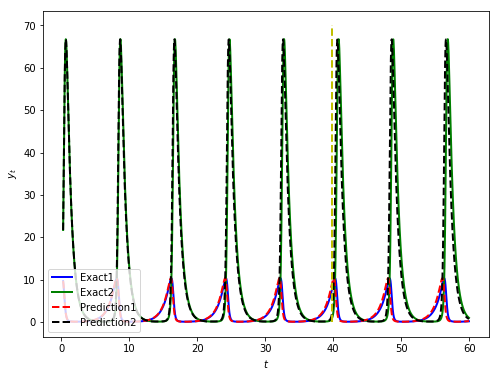

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#from models_tf import RNN

np.random.seed(1234)
    
if __name__ == "__main__":
    
    def create_dataset(data, lags):
        N = len(data)-lags
        data_dim = data.shape[1]
        X = np.zeros((lags, N, data_dim))
        Y = np.zeros((N, data_dim))
        for i in range(0,N):
            X[:,i,:] = data[i:(i+lags), :]
            Y[i,:] = data[i + lags, :]
        return X, Y
    
    def pend(z, t, alpha, beta, gamma, sigma):
        x, y = z
        dzdt = [x*(alpha - beta*y), -y*(gamma - sigma*x)]
        return dzdt

    alpha = 1.
    beta = 0.1
    gamma = 1.5
    sigma = 0.75

    z0 = [10., 5.0]
    tt = np.linspace(0, 60, 2000)
    data = odeint(pend, z0, tt, args=(alpha, beta, gamma, sigma))
    
    t = np.arange(0,60,0.03)[:,None]
    dataset = data#f(t)
    
#    y1 = np.sin(tt)
#    y2 = np.cos(tt)
#    dataset = np.vstack((y1, y2))
#    dataset = dataset.T
#    print(dataset.shape)
    
    mu, std = dataset.mean(0), dataset.std(0)
    dataset = (dataset - mu) / std
    
    # Use 2/3 of all data as training Data
    train_size = int(len(dataset) * (2.0/3.0))
    train = dataset[0:train_size,:]
    
    # reshape X and Y
    lags = 8
    X, Y = create_dataset(train, lags)
    
    # Model creation
    hidden_dim = 20
    model = RNN(X, Y, hidden_dim)
    
    model.train(nIter = 20000, batch_size = 128)
    
    # Prediction
    pred = np.zeros((len(dataset)-lags, Y.shape[-1]))
    X_tmp =  np.copy(X[:,0:1,:])
    for i in range(0, len(dataset)-lags):
        pred[i] = model.predict(X_tmp)
        X_tmp[:-1,:,:] = X_tmp[1:,:,:] 
        X_tmp[-1,:,:] = pred[i]
        
    pred = pred * std + mu
    dataset = dataset * std + mu
        
    plt.figure(1, figsize = (8, 6))
    plt.plot(t[lags:], dataset[lags:,0], 'b-', linewidth = 2, label = "Exact1")
    plt.plot(t[lags:], dataset[lags:,1], 'g-', linewidth = 2, label = "Exact2")
    plt.plot(t[lags:], pred[:,0], 'r--', linewidth = 2, label = "Prediction1")
    plt.plot(t[lags:], pred[:,1], 'k--', linewidth = 2, label = "Prediction2")
    plt.plot(X.shape[1]*np.ones((100,1))*0.03, np.linspace(0,70,100), 'y--', linewidth=2)
    plt.axis('tight')
    plt.xlabel('$t$')
    plt.ylabel('$y_t$')
    plt.legend(loc='lower left')
    